# Introduction

The Varieties of Democracy (V-DEM) Dataset reflects the concept of democracy as a system of rule globally. It does so by using indicators and formulas based on certain principles of democracy to provide ratings for each country's political system.

The project is massive and even has its own extensive graphing tools to help visualize the dataset. You can find information about the project, publications, briefs, working papers, as well as the dataset itself, [here](https://v-dem.net/).

What follows is a demonstration of the use of certain Python packages to manipulate the dataset and produce plots and graphs that visualize certain aspects of the data. This particular project was born out of my curiosity to get a better picture of my own country's (Greece) quality of democracy. However, I did not wish to bind myself down with a specific academic question, so you will find that much of the code could be used for any other country in the dataset, and likewise, many of the graphs show a lot of information about other european countries as well.

Nevertheless, the focus is both on Europe and on Greece, and the vast majority of the graphs involve countries that are either members of the european Union or are situated in the general geographical region of Europe.

Due to the nature of the dataset, the graphs are strictly descriptive, and no attempt is made at any statistical inference. However, the V-DEM's official site does provide some applications that aim for a degree of future prediction, such as the V-Forecast and the Demspace.

Please be aware that, while the subject matter is inherently political, I will only be describing what is visible in the graphs without providing any other background information or discussing methodology. This is intended to be a showcase of Python code and not a political analysis or academic study.

Also note that this is intended to be a short project, so certain ```pandas``` functions that take much longer to compute because of the number of columns, such as ```describe()```, are avoided for the sake of expediency.

# 1. a) Imports and Dataset Loading

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
vdem = pd.read_csv(r"C:\Users\Unknown\V-Dem-CY-Full+Others-v13.csv")

C:\Users\Unknown\AppData\Local\Temp\ipykernel_11752\235179495.py:1: DtypeWarning: Columns (364,365,366,394,410,821,831,832,930,1235,1252,1481,3063,3282,3283,3351,3353,3357,3358,3360,3361,3362) have mixed types. Specify dtype option on import or set low_memory=False.
  vdem = pd.read_csv(r"C:\Users\Unknown\V-Dem-CY-Full+Others-v13.csv")


### Warning Bypass
To bypass the above warning encountered when importing the V-DEM dataset, we must specify the data type for the required columns. We can understand what type each column should consist of by choosing the column and using the ```unique()``` method (should be used for each column) to see the entries. Other, lazier options include importing with ```low_memory=False``` or using the ```infer_objects()``` method. I prefer to go the slow but steady way here:

In [3]:
# Check the data type needed for each column
vdem.iloc[:, 365].unique() 

array([nan, 'National Action Party', 'National Democratic Front', ...,
       'Linksliberale', 'Nationalliberale', 'Freisinn'], dtype=object)

In [4]:
vdem.iloc[:, 365].name 

'v2slpname'

In [5]:
list_of_columns = [vdem.iloc[:, 364], vdem.iloc[:, 365], vdem.iloc[:, 366], vdem.iloc[:, 394],
                   vdem.iloc[:, 410], vdem.iloc[:, 821], vdem.iloc[:, 831], vdem.iloc[:, 832],
                   vdem.iloc[:, 930], vdem.iloc[:, 1235], vdem.iloc[:, 1252], vdem.iloc[:, 1481], 
                   vdem.iloc[:, 3063], vdem.iloc[:, 3282], vdem.iloc[:, 3283], vdem.iloc[:, 3351], 
                   vdem.iloc[:, 3353], vdem.iloc[:, 3357], vdem.iloc[:, 3358], vdem.iloc[:, 3360], 
                   vdem.iloc[:, 3361], vdem.iloc[:, 3362]]

In [6]:
# Get the names of the columns with mixed data types
vdem_list_of_column_names = [column.name for column in list_of_columns]
vdem_list_of_column_names 

['v2lpname',
 'v2slpname',
 'v2tlpname',
 'v2elregnam',
 'v2ellocnam',
 'v2exparhos',
 'v2exnamhog',
 'v2extithog',
 'v2expothog',
 'v2lgnameup',
 'v2lgnamelo',
 'v2juhcname',
 'v3lgcamoth',
 'v3lgnamelo',
 'v3lgnameup',
 'v3ellocnam',
 'v3elregnam',
 'v3exnamhog',
 'v3exnamhos',
 'v3extithog',
 'v3extithos',
 'v3juhcname']

In [7]:
# Create converter for import with names of columns
vdem_import_dtype_converter = {column_dtype:"str" for column_dtype in vdem_list_of_column_names}
vdem_import_dtype_converter 

{'v2lpname': 'str',
 'v2slpname': 'str',
 'v2tlpname': 'str',
 'v2elregnam': 'str',
 'v2ellocnam': 'str',
 'v2exparhos': 'str',
 'v2exnamhog': 'str',
 'v2extithog': 'str',
 'v2expothog': 'str',
 'v2lgnameup': 'str',
 'v2lgnamelo': 'str',
 'v2juhcname': 'str',
 'v3lgcamoth': 'str',
 'v3lgnamelo': 'str',
 'v3lgnameup': 'str',
 'v3ellocnam': 'str',
 'v3elregnam': 'str',
 'v3exnamhog': 'str',
 'v3exnamhos': 'str',
 'v3extithog': 'str',
 'v3extithos': 'str',
 'v3juhcname': 'str'}

# 1. b) Imports and Dataset Loading with Converter

In [8]:
# Only run if this is the starting point, ignore otherwise 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
sns.set_theme()

In [9]:
# Time saving portable converter copy, allowing us to avoid loading the vdem twice 
vdem_portable_import_dtype_converter = {"v2lpname": "str",
                                        "v2slpname": "str",
                                        "v2tlpname": "str",
                                        "v2elregnam": "str",
                                        "v2ellocnam": "str",
                                        "v2exparhos": "str",
                                        "v2exnamhog": "str",
                                        "v2extithog": "str",
                                        "v2expothog": "str",
                                        "v2lgnameup": "str",
                                        "v2lgnamelo": "str",
                                        "v2juhcname": "str",
                                        "v3lgcamoth": "str",
                                        "v3lgnamelo": "str",
                                        "v3lgnameup": "str",
                                        "v3ellocnam": "str",
                                        "v3elregnam": "str",
                                        "v3exnamhog": "str",
                                        "v3exnamhos": "str",
                                        "v3extithog": "str",
                                        "v3extithos": "str",
                                        "v3juhcname": "str"}

In [10]:
vdem = pd.read_csv(r"C:\Users\Unknown\V-Dem-CY-Full+Others-v13.csv", dtype=vdem_portable_import_dtype_converter)

In [11]:
vdem

,country_name,country_text_id,country_id,year,historical_date,project,historical,histname,codingstart,codingend,...,e_pefeliex,e_peinfmor,e_pelifeex,e_pematmor,e_wb_pop,e_civil_war,e_miinteco,e_miinterc,e_pt_coup,e_pt_coup_attempts
0,Mexico,MEX,3,1789,1789-12-31,1,1,Viceroyalty of New Spain,1789,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,Mexico,MEX,3,1790,1790-12-31,1,1,Viceroyalty of New Spain,1789,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2,Mexico,MEX,3,1791,1791-12-31,1,1,Viceroyalty of New Spain,1789,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,Mexico,MEX,3,1792,1792-12-31,1,1,Viceroyalty of New Spain,1789,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
4,Mexico,MEX,3,1793,1793-12-31,1,1,Viceroyalty of New Spain,1789,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27550,Piedmont-Sardinia,SPD,373,1857,1857-12-31,1,1,Kingdom of Piedmont-Sardinia,1789,1861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27551,Piedmont-Sardinia,SPD,373,1858,1858-12-31,1,1,Kingdom of Piedmont-Sardinia,1789,1861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27552,Piedmont-Sardinia,SPD,373,1859,1859-12-31,1,1,Kingdom of Piedmont-Sardinia [incorporates Lom...,1789,1861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27553,Piedmont-Sardinia,SPD,373,1860,1860-12-31,1,1,NaN,1789,1861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Information on the Coders Used in V-DEM:

I have chosen to use the five high-level indices of V-DEM as well as ten mid-level indicators for the plots that follow. The choice of the mid-level indicators to be included was arbitrary. All indicators and indices in the original dataset are in scale [0,1]. Below, I include their names (used to rename the columns of our Dataframes in the next cell) matched to their coder names. There is also some information on each one, taken directly from the accompanying V-DEM PDF Codebook.
 
While by no means is this project intended to have any actual academic merit, I believe quick access to what each indicator and index stands for may ease the interpretation of some of the graphs that follow. Of course, for a much more complete understanding of the Varieties of Democracy dataset, I would suggest a quick read of the codebook itself:

>"*V-DEM, Varieties of Democracy Codebook*", v13 - March 2023, pp. 44-57,
available [here](https://www.v-dem.net/data/the-v-dem-dataset/) 

The Full V-Dem citation can be found in the final cell of this project.

## **Columns**:

***Identifier Variable***:

 * country_name
 * year
 
### High-Level Indices:  

 * **v2x_polyarchy**: ***Electoral democracy index***
 
 Question: To what extent is the ideal of electoral democracy in its fullest sense achieved?
 
 Clarification: The electoral principle of democracy seeks to embody the core value of making rulers responsive to citizens, achieved through electoral competition for the electorate’s approval under circumstances when suffrage is extensive; political and civil society organizations can operate freely; elections are clean and not marred by fraud or systematic irregularities; and elections affect the composition of the chief executive of the country. In between elections, there is freedom of expression and an independent media capable of presenting alternative views on matters of political relevance. In the V-Dem conceptual scheme, electoral democracy is understood as an essential element of any other conception of representative democracy — liberal, participatory, deliberative, egalitarian, or some other.
 
 * **v2x_libdem**: ***Liberal democracy index***  

 Question: To what extent is the ideal of liberal democracy achieved?
 
Clarification: The liberal principle of democracy emphasizes the importance of protecting individual and minority rights against the tyranny of the state and the tyranny of the majority. The liberal model takes a "negative" view of political power insofar as it judges the quality of democracy by the limits placed on government. This is achieved by constitutionally protected civil liberties, strong rule of law, an independent judiciary, and effective checks and balances that, together, limit the exercise of executive power. To make this a measure of liberal democracy, the index also takes the level of electoral democracy into account.
 
 * **v2x_partipdem**: ***Participatory democracy index***
 
 Question: To what extent is the ideal of participatory democracy achieved?

Clarification: The participatory principle of democracy emphasizes active participation by citizens in all political processes, electoral and non-electoral. It is motivated by uneasiness about a bedrock practice of electoral democracy: delegating authority to representatives. Thus, direct rule by citizens is preferred, wherever practicable. This model of democracy thus takes suffrage for granted, emphasizing engagement in civil society organizations, direct democracy, and subnational elected bodies. To make it a measure of participatory democracy, the index also takes the level of electoral democracy into account.
 
 * **v2x_delibdem**: ***Deliberative democracy index***
 
 Question: To what extent is the ideal of deliberative democracy achieved?

Clarification: The deliberative principle of democracy focuses on the process by which decisions are reached in a polity. A deliberative process is one in which public reasoning focused on the common good motivates political decisions—as contrasted with emotional appeals, solidary attachments, parochial interests, or coercion. According to this principle, democracy requires more than an aggregation of existing preferences. There should also be respectful dialogue at all levels—from preference formation to final decision—among informed and competent participants who are open to persuasion. To make it a measure of not only the deliberative principle but also of democracy, the index also takes the level of electoral democracy into
account.
 * **v2x_egaldem**: ***Egalitarian democracy index*** 
 
 Question: To what extent is the ideal of egalitarian democracy achieved?
 
Clarification: The egalitarian principle of democracy holds that material and immaterial inequalities inhibit the exercise of formal rights and liberties, and diminish the ability of citizens from all social groups to participate. Egalitarian democracy is achieved when 1 rights and freedoms of individuals are protected equally across all social groups; and 2 resources are distributed equally across all social groups; 3 groups and individuals enjoy equal access to power. To make it a measure of egalitarian democracy, the index also takes the level of electoral democracy into account.


### Mid-Level Indices:

 * **v2x_freexp_altinf**: ***Freedom of Expression and Alternative Sources of Information index*** 

 Question: To what extent does government respect press and media freedom, the freedom of ordinary people to discuss political matters at home and in the public sphere, as well as the freedom of academic and cultural expression?
 
 * **v2x_frassoc_thick**: ***Freedom of association thick index*** 
 
 Question: To what extent are parties, including opposition parties, allowed to form and to participate in elections, and to what extent are civil society organizations able to form and to operate freely?
 
 * **v2x_liberal**: ***Liberal component index*** 
 
 Question: To what extent is the liberal principle of democracy achieved?
 
 The liberal principle of democracy emphasizes the importance of protecting individual and minority rights against the tyranny of the state and the tyranny of the majority. The liberal model takes a "negative" view of political power insofar as it judges the quality of democracy by the limits placed on government. This is achieved by constitutionally protected civil liberties, strong rule of law, an independent judiciary, and effective checks and balances that, together, limit the exercise of executive power.
 
 * **v2xcl_rol**: ***Equality before the law and individual liberty index*** 
 
 Question: To what extent are laws transparent and rigorously enforced and public administration impartial, and to what extent do citizens enjoy access to justice, secure property rights, freedom from forced labor, freedom of movement, physical integrity rights, and freedom of religion?
 
 * **v2x_jucon**: ***Judicial constraints on the executive index*** 
 
 Question: To what extent does the executive respect the constitution and comply with court rulings, and to what extent is the judiciary able to act in an independent fashion?

 * **v2xlg_legcon**: ***Legislative constraints on the executive index***   
 
 Question: To what extent are the legislature and government agencies e.g., comptroller general, general prosecutor, or ombudsman capable of questioning, investigating, and exercising oversight over the executive?
 
 * **v2x_cspart**: ***Civil society participation index***
 
 Question: Are major CSOs routinely consulted by policymakers; how large is the involvement of people in CSOs; are women prevented from participating; and is legislative candidate nomination within party organization highly decentralized or made through party primaries?

Clarification: The sphere of civil society lies in the public space between the private sphere and the state. Here, citizens organize in groups to pursue their collective interests and ideals. We call these groups civil society organizations CSOs. CSOs include, but are by no means limited to, interest groups, labor unions, spiritual organizations if they are engaged in civic or political activities, social movements, professional associations, charities, and other non-governmental organizations. The core civil society index CCSI is designed to provide a measure of a robust civil society,
understood as one that enjoys autonomy from the state and in which citizens freely and actively pursue their political and civic goals, however conceived.
 
 * **v2xeg_eqprotec**: ***Equal protection index*** 
 
 Question: How equal is the protection of rights and freedoms across social groups by the state?
 
Clarification: Equal protection means that the state grants and protects rights and freedoms evenly across social groups. To achieve equal protection of rights and freedoms, the state itself must not interfere in the ability of groups to participate and it must also take action to ensure that rights and freedoms of one social group are not threatened by the actions of another group or individual.
 
 * **v2xeg_eqaccess**: ***Equal access index***
 
 Question: How equal is access to power?
 
Clarification: The Equal Access subcomponent is based on the idea that neither the protections of rights and freedoms nor the equal distribution of resources is sufficient to ensure adequate representation. Ideally, all groups should enjoy equal de facto capabilities to participate, to serve in positions of political power, to put issues on the agenda, and to influence policymaking.
 
 * **v2xeg_eqdr**: ***Equal distribution of resources index***
 
 Question: How equal is the distribution of resources?
 
Clarification: This component measures the extent to which resources — both tangible and intangible — are distributed in society. An equal distribution of resources supports egalitarian democracy in two ways. First, lower poverty rates and the distribution of goods and services such as food, water, housing, education and healthcare ensure that all individuals are capable of participating in politics and government. In short, basic needs must be met in order for individuals to effectively exercise their rights and freedoms.
 

# 3. Dataset Preparation

  The V-DEM dataset is mostly a clean, long-format dataset. In the following cells, I will divide it into several smaller datasets consisting only of specific indicators explained in the previous section. Some of the code that follows could be adapted to accommodate all the indicators present in the dataset with only just a few adjustments, but this would be beyond the scope of this project.
 
  As mentioned in the introduction, the other criterion for the creation of these datasets is that they consist of countries belonging to the geographical area of Europe.

   The first Dataframe contains only the twenty-seven member states of the european Union, while the other four categorize countries according to their general geographical position. For this project, any country with a population under 100.000 is excluded (namely Andorra, Liechtenstein, San Marino, the Holy See, and the Mount of Athos). The reason for this is that I am of the opinion that the effect they have on most aggregations is perhaps disanalogous to their size. Additionally, I considered it interesting to also include Turkey and Russia in some of the graphs because of both historicity and geographical approximation, as well as because of their significant population size.  
 
  Note that the definitions of european South, North, West, and East are my own and there are numerous countries that could be included in many of these groups (or none) depending on the criterion chosen to categorize them.      

In [12]:
# Renaming dict for clarity in columns

renaming_convention_dict = {"v2x_polyarchy": "Electoral_Democracy_Index",
                            "v2x_libdem": "Liberal_Democracy_Index",
                            "v2x_partipdem": "Participatory_Democracy_Index",
                            "v2x_delibdem": "Deliberative_Democracy_Index",
                            "v2x_egaldem": "Egalitarian_Democracy_Index",
                            "v2x_freexp_altinf": "Freedom_of_Expression_and_Alternative_Sources_of_Information_Index",
                            "v2x_frassoc_thick": "Freedom_of_Association_Thick_Index",
                            "v2x_liberal": "Liberal_Component_Index",
                            "v2xcl_rol": "Equality_before_the_Law_and_Individual_Liberty_Index",
                            "v2x_jucon": "Judicial_Constraints_on_the_Executive_Index",
                            "v2xlg_legcon": "Legislative_Constraints_on_the_Executive_Index",
                            "v2x_cspart": "Civil_Society_Participation_Index",
                            "v2xeg_eqprotec": "Equal_Protection_Index",
                            "v2xeg_eqaccess": "Equal_Access_Index",
                            "v2xeg_eqdr":"Equal_Distribution_of_Resources_Index",
                            "country_name": "Country_Name"
                           }

In [13]:
vdem.rename(columns=renaming_convention_dict, inplace=True)

In [14]:
# Lists of groups of countries used in the plots

eu_country_list = ["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", 
                   "Estonia", "Finland", "France", "Germany", "Greece",
                   "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", 
                   "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal", "Romania", 
                   "Slovakia", "Slovenia", "Spain", "Sweden"]

european_north = ["Denmark", "Estonia", "Finland", "Iceland", "Ireland", "Latvia", 
                  "Lithuania", "Norway", "Sweden", "United_Kingdom"]

european_west = ["Austria", "Belgium", "France", "Germany",
                 "Luxembourg", "Monaco", "Netherlands", "Switzerland"]


european_south = ["Cyprus", "Greece", "Italy", "Malta", "Portugal", "Spain"]


eastern_europe_and_balkans = ["Albania", "Belarus", "Bosnia & Herzegovina", "Bulgaria", "Croatia",
                              "Greece", "Kosovo", "Moldova", "Montenegro", "North Macedonia", 
                              "Romania", "Russia", "Serbia", "Slovakia",
                              "Slovenia", "Ukraine", "Turkey"]

fingrit_list = ["Finland", "Greece", "Italy"]

In [15]:
# Function to select specific countries and indicators

def select_country(country, year_start, year_end):
    countryname = vdem.loc[(vdem["Country_Name"] == country)
                           & (vdem["year"] >= year_start) & (vdem["year"] <= year_end)]
    country_relevant_inds = countryname.get(["Country_Name", "year", 
                                             "Electoral_Democracy_Index","Liberal_Democracy_Index", 
                                             "Participatory_Democracy_Index",
                                             "Deliberative_Democracy_Index", "Egalitarian_Democracy_Index",
                                             "Freedom_of_Expression_and_Alternative_Sources_of_Information_Index", 
                                             "Freedom_of_Association_Thick_Index",
                                             "Liberal_Component_Index", 
                                             "Equality_before_the_Law_and_Individual_Liberty_Index", 
                                             "Judicial_Constraints_on_the_Executive_Index", 
                                             "Legislative_Constraints_on_the_Executive_Index",
                                             "Civil_Society_Participation_Index", "Equal_Protection_Index", 
                                             "Equal_Access_Index",
                                             "Equal_Distribution_of_Resources_Index"]).reset_index(drop=True)
    
    return  country_relevant_inds

# Function to create Dataframes out of the lists with country names

def create_dataframe(countries):
    dct1 = {}
    for country in countries:
        dct1[country] = select_country(country, 2000, 2022)

    return pd.concat(dct1.values()) 

In [16]:
# Group Dataframes for comparisons and dataset exporting 

vdem_european_union_stats = create_dataframe(eu_country_list)
vdem_european_north_stats = create_dataframe(european_north)
vdem_european_west_stats = create_dataframe(european_west)
vdem_european_south_stats = create_dataframe(european_south)
eastern_europe_and_balkans_stats = create_dataframe(eastern_europe_and_balkans)
vdem_europe_stats = pd.concat([vdem_european_union_stats, vdem_european_north_stats, 
                               vdem_european_south_stats, vdem_european_west_stats, 
                               eastern_europe_and_balkans_stats]).drop_duplicates(inplace=False)
vdem_today = vdem.loc[vdem["year"] == 2022].copy() 
fingrit = create_dataframe(fingrit_list)

In [17]:
# Check for NaN values
vdem_europe_stats.isna().values.any() 

False

In [18]:
vdem_today.isna().values.any()
# At the moment we don't know if the NaN values are in the indicators we will need, so no further action is necessary

True

These datasets can also be saved for future use, so as to avoid having to reload the entire V-DEM.

# 4. Graphical Representations and Exploration of the Data

To begin with, I will attempt to present how the inclusion of EU democracies affects the global distribution of the Electoral Democracy Index rating. Two figures will follow: one comparing the Kernel Density Estimations of the Electoral Democracy Index with and without the EU in 2022, and one doing the same comparison but with histograms instead of KDEs. It is useful to have an idea of the EU democracies' Electoral Democracy Index ratings when compared to the rest of the world before we continue with any comparisons within Europe itself.  

In [19]:
#Check for null values in speciffic column
vdem_today["Electoral_Democracy_Index"].isna().values.any()

False

In [20]:
# Prepare dataset which does not include European Union countries
european_countries = {}

for i in eu_country_list:
        european_countries[i] = vdem.loc[(vdem["Country_Name"]==i) & (vdem["year"]==2022)]
        
eu = pd.concat(european_countries).reset_index(drop=True)
eu_fixed = eu.rename(columns=renaming_convention_dict)

vdem_not_eu = pd.concat([vdem_today, eu_fixed]).drop_duplicates(keep=False) 

In [21]:
#Check for null values 
vdem_not_eu["Electoral_Democracy_Index"].isna().values.any() 

False

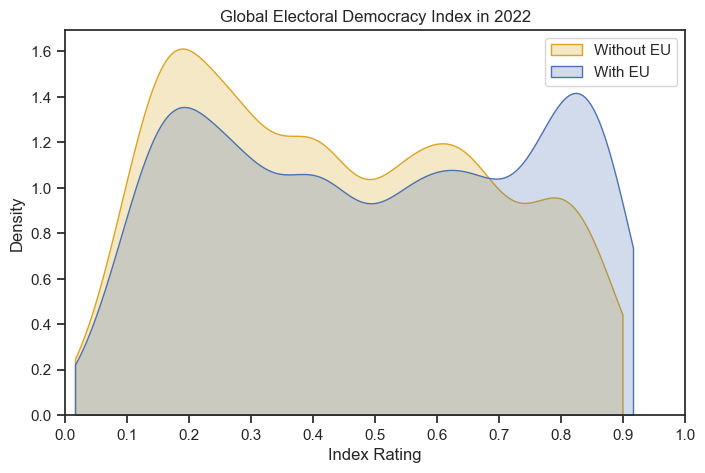

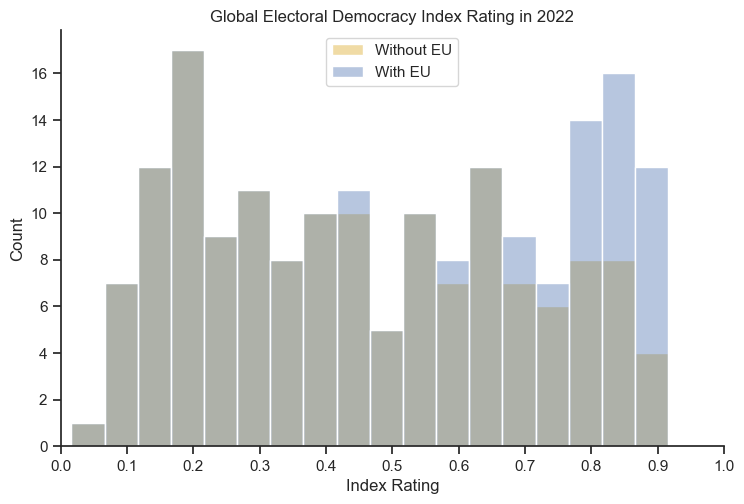

In [22]:
# The two kdeplots plot on the same axis by default, since kdeplot is an axis funtion
with sns.axes_style("ticks"):
    fig = plt.figure(figsize=(8,5))
    sns.kdeplot(vdem_not_eu, x="Electoral_Democracy_Index", legend=True, fill=True, color="goldenrod",
                label="Without EU", cut=0, bw_adjust=0.6).set(title="Global Electoral Democracy Index in 2022")
    sns.kdeplot(vdem_today, x="Electoral_Democracy_Index", legend=True, fill=True, 
                label="With EU", cut=0, bw_adjust=0.6).set(xticks=np.arange(0, 1.1, 0.1))
    plt.xlim(left=0, right=1)
    plt.xlabel("Index Rating")
    plt.legend()


# displot sets the figure specs, since it is a figure function
with sns.axes_style("ticks"):
    sns.displot(vdem_not_eu, x="Electoral_Democracy_Index",   
                color="goldenrod", legend=True,  binwidth=0.05, 
                label ="Without EU", 
                alpha=0.4, height=5, aspect=1.5).set(title="Global Electoral Democracy Index Rating in 2022", 
                                                     xticks=np.arange(0, 1.1, 0.1))
    plt.xlim(left=0, right=1)
    plt.xlabel("Index Rating")

# histplot will follow displot's figure, as it's an axis function
    sns.histplot(vdem_today, x="Electoral_Democracy_Index", alpha=0.4,  
                 binwidth=0.05, label ="With EU")  
    plt.xlim(left=0, right=1)
    plt.legend();

Evidently, the inclusion of the EU in the representation allows us to see that, as expected, the vast majority of the EU countries score very high in the Electoral Democracy Index, with most of them being within the 0.75-0.95 range. We can also clearly see that the majority of countries globally score around 0.2 on the EDI scale. 

The apparent bimodality could perhaps be explained by the fact that many countries have different political systems and are therefore immediately classified as having very low scores in every area of democratic rule, much more so when it comes to the electoral aspect of democracy.

Also evident is the difficulty of the KDEs to sufficiently present the data when compared to the much simpler and ultimately clearer histograms. 

What follows is a graph depicting the average scores of the five high-level indices in the european Union in the past twenty years. Note that the Confidence Intervals have been removed since they overburden the plot: 

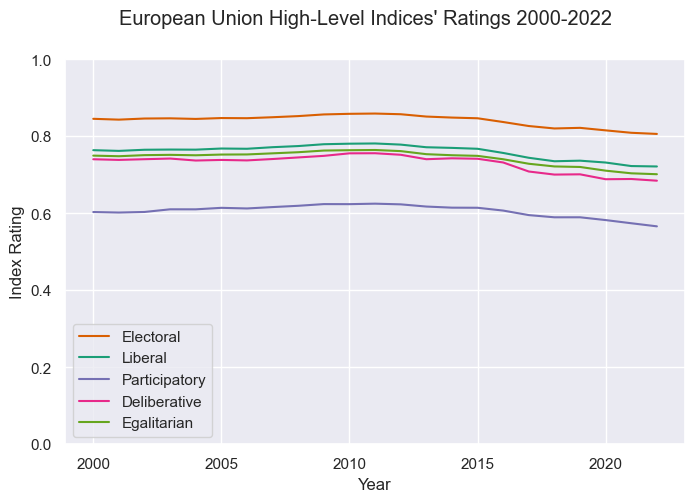

In [23]:
# Plot function for the five high-level indices 

def five_inds_linesplot(data):
    sns.lineplot(data, x="year", y="Electoral_Democracy_Index", 
                 estimator="mean", errorbar=None, 
                 color="#d95f02", label="Electoral")
    sns.lineplot(data, x="year", y="Liberal_Democracy_Index",
                 estimator="mean", errorbar=None, 
                 color="#1b9e77", label="Liberal")
    sns.lineplot(data, x="year", y="Participatory_Democracy_Index", 
                 estimator="mean", errorbar=None,
                 color="#7570b3", label="Participatory")
    sns.lineplot(data, x="year", y="Deliberative_Democracy_Index", 
                 estimator="mean", errorbar=None, 
                 color="#e7298a", label="Deliberative")
    sns.lineplot(data, x="year", y ="Egalitarian_Democracy_Index", 
                 estimator="mean", errorbar=None,
                 color="#66a61e", label="Egalitarian")


fig = plt.figure(figsize=(8,5))
ax = plt.axes()


five_inds_linesplot(vdem_european_union_stats)


ax.set_ylim(bottom=0, top=1)
ax.set_xlabel("Year")
ax.set_ylabel("Index Rating")
fig.suptitle("European Union High-Level Indices' Ratings 2000-2022", fontsize="large");

It appears that there is a rise in all five indices up until the first few years of the 2010s', after which they all start to gradually decline. Interestingly, it would seem that COVID-19 and the measures taken during the period of the pandemic did not so much exacerbate the decline in democratic quality in the EU as some would have thought, but instead continued a trend that was already well-established before the arrival of the virus. 


In the next set of graphs, we can see the same indices but for four different country groups based on geographical and cultural similarities:

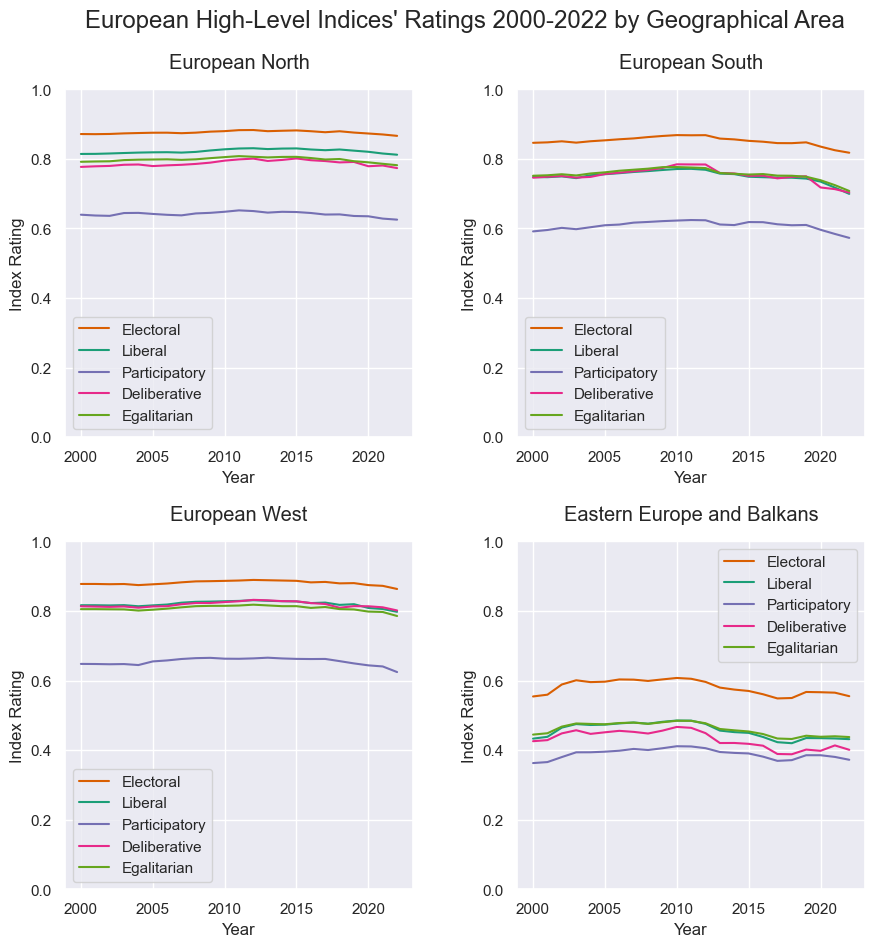

In [24]:
# Indices of the four different country groups

fig = plt.figure(figsize=(10, 10))

ax1 = plt.subplot(221)
five_inds_linesplot(vdem_european_north_stats)
ax1.set_title("European North", pad=15, fontsize="large")

ax2 = plt.subplot(222)
five_inds_linesplot(vdem_european_south_stats)
ax2.set_title("European South", pad=15, fontsize="large")

ax3 = plt.subplot(223)
five_inds_linesplot(vdem_european_west_stats)
ax3.set_title("European West", pad=15, fontsize="large")

ax4 = plt.subplot(224)
five_inds_linesplot(eastern_europe_and_balkans_stats)
ax4.set_title("Eastern Europe and Balkans", pad=15, fontsize="large")

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.set(ylabel="Index Rating", xlabel="Year")
    ax.set_ylim(bottom=0, top=1)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.3)  

fig.suptitle("European High-Level Indices' Ratings 2000-2022 by Geographical Area", fontsize="x-large");   

What is evident here is that there is a slight decline in all aspects of democracy in all geographical groups in Europe since 2015, similar to the one we saw in the previous graph. It could perhaps be associated with the beginning of the refugee crisis in Europe.

Countries in Eastern Europe and the Balkans score significantly lower on aggregate than countries in the rest of the areas. Keep in mind that both Russia and Turkey are part of the Eastern Europe and Balkans group.  

However, there is also an evident increase in the steepness of the decline in the countries of all groups, starting in 2019. Said increase in steepness seems to be more prevalent in countries of the european South. 

Obviously, the arrival of COVID-19 and each EU government's response play a role here, but it is worth noting that Italy was the first epicenter of the virus in Europe. On the other hand, it appears that the already low levels of Easter Europe were not as affected by the arrival of the pandemic.

Next, we will delve deeper by graphing the same indices for every country in the european Union. I am going to make use of ```seaborn```'s OOP interface for this task, utilizing the astonishingly high-level ```col``` keyword of seaborn's ```FacetGrid```:

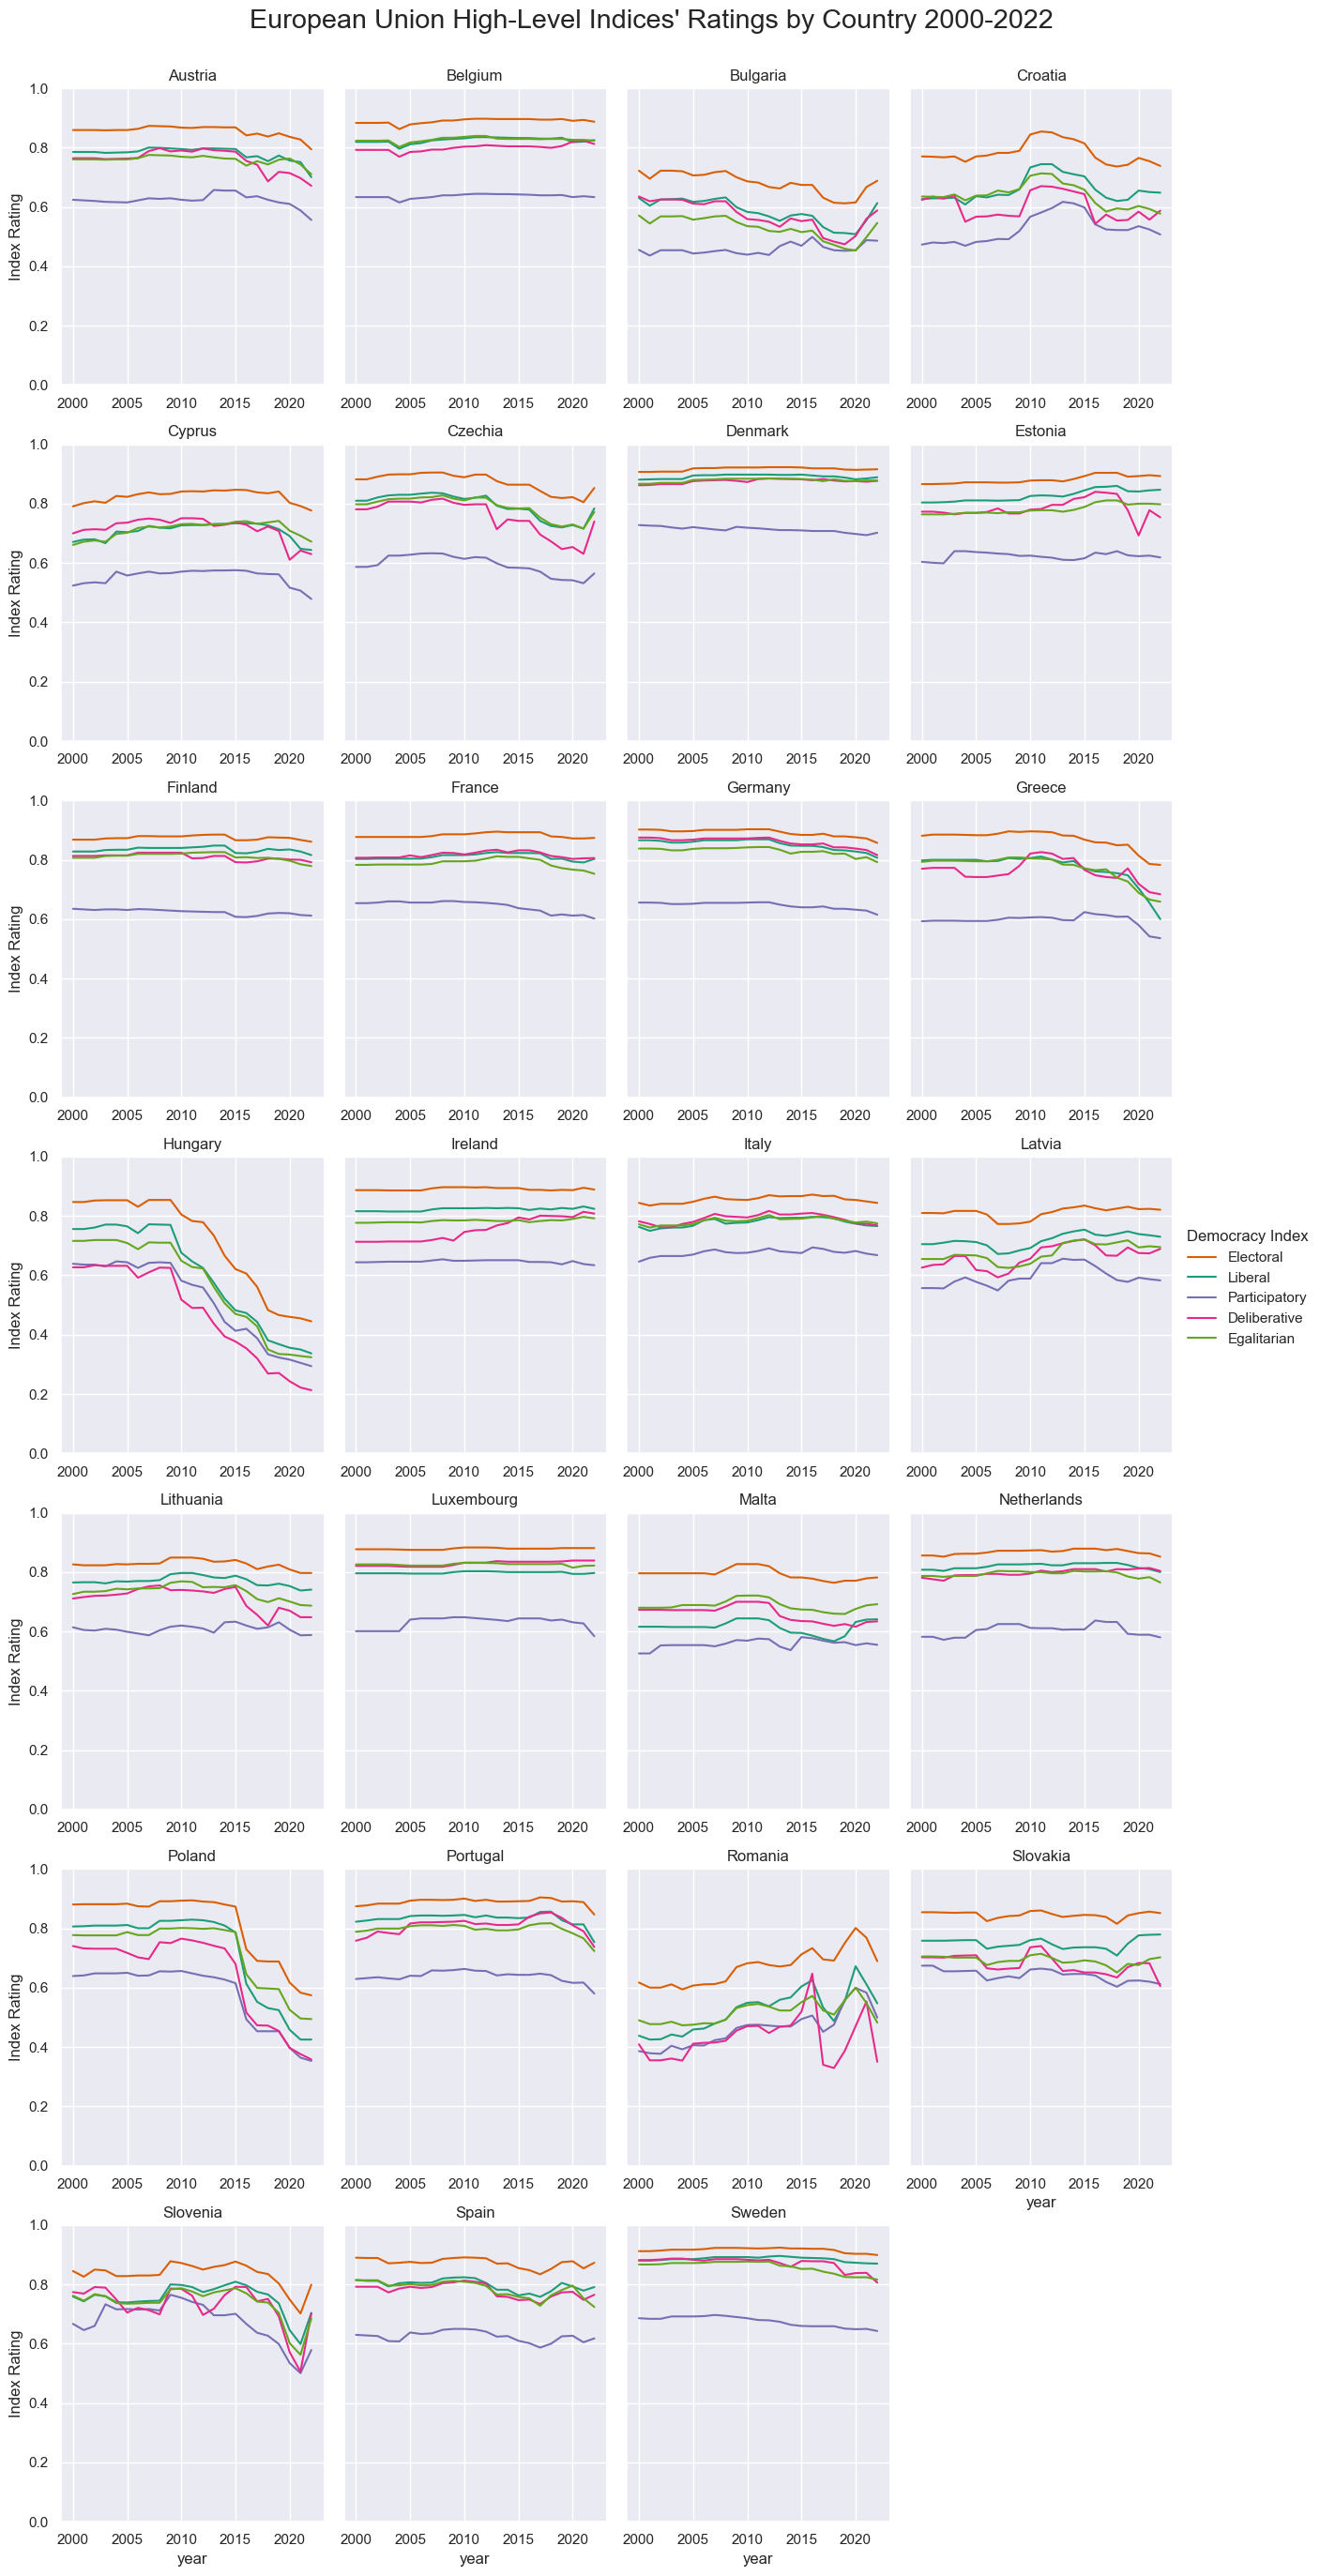

In [25]:
# Sns oop interface, depict every country's five indicators

# Facegrid object creation and customization
eu_general_dem = sns.FacetGrid(vdem_european_union_stats, col="Country_Name", 
                               col_wrap=4, sharex=False, legend_out=True, 
                               height=4, aspect=0.8, ylim=(0, 1))

# Line Plots mapping to Facegrid
eu_general_dem.map(sns.lineplot, "year", "Electoral_Democracy_Index", color="#d95f02", label="Electoral")
eu_general_dem.map(sns.lineplot, "year", "Liberal_Democracy_Index", color="#1b9e77", label="Liberal")
eu_general_dem.map(sns.lineplot, "year", "Participatory_Democracy_Index", color="#7570b3", label="Participatory")
eu_general_dem.map(sns.lineplot, "year", "Deliberative_Democracy_Index", color="#e7298a", label="Deliberative")
eu_general_dem.map(sns.lineplot, "year", "Egalitarian_Democracy_Index", color="#66a61e", label="Egalitarian")

eu_general_dem.set_axis_labels("year", "Index Rating")

# Add the names of the countries as a title to each graph
for key,ax in eu_general_dem.axes_dict.items():
    ax.set_title(f"{key}")  

# Legend matched to each line's label
eu_general_dem.add_legend(title="Democracy Index") 
    
eu_general_dem.fig.subplots_adjust(top=0.95) 
eu_general_dem.fig.suptitle("European Union High-Level Indices' Ratings by Country 2000-2022", fontsize="xx-large");


What has become more evident with the above graphs are both the decline in some european countries such as Greece, Portugal, Cyprus and Austria, and the much, much more steep decline in others such as Hungary and Poland. They also show other interesting facts, such as Slovenia's and Czechia's overall trend reversal in 2021, Ireland's very steep incline in Deliberative Democracy throughout the last decade and into this one, and Romania's massive fluctuations in all aspects of Democracy since 2016. While this level of abstraction can be useful, I would imagine an entire library would be needed to fully explain each of these graphs in detail and identify the factors at play behind them.

When it comes to Greece, we can see that a slow decline in all indices begins in 2010-2012, which would coincide with the start of the Greek Financial Crisis. However, a few interesting points can be noted: first, there is a significant drop in democratic deliberation from 2001 to 2008; then there is the fact that the true steep decline in all five indices began around 2014; finally, despite a brief rise in the Electoral and Deliberative Democracy Index ratings in 2019, all ratings massively drop from 2019 onwards. 

At first glance, it would appear that this drop coincides with the arrival of COVID-19. However, more careful observation of the data reveals that the other countries of the european South do not have similar index decreases, despite being as affected by the pandemic as Greece, to say the least. What also becomes evident is that the steep decrease begins in 2019 and does not change direction until today. 

2019 was also the year of elections in Greece, which leads to the hypothesis that the government elected in 2019 actively influenced the decrease of democratic quality in Greece. To be able to further examine this hypothesis, the next set of graphs depict a comparison of the five indices and ten indicators between Greece, Italy (the epicenter of COVID-19 in Europe), and Finland (a european country that shares Greece's small population but is not part of the european South). Unfortunately, ```seaborn``` is too high level for this task so we will have to rely on ```matplolib```'s low-level functionality:

In [26]:
# Functions to create customized bar charts and line plots, used in the following cells

# Draw bars with sorted data
def plot_comparison_indicator_bars(data, indname):
    data = data.sort_values(by=indname, ascending=False)
    final = data.rename(columns={"Country_Name": "Country", indname: "Indicator"})
    final_comparative_plot = sns.barplot(final, x="Indicator", 
                                         y="Country", palette="viridis_r").set(xlabel="Index Rating", 
                                                                               ylabel="Country", 
                                                                               xlim=(0, 1))
    return final_comparative_plot


# Draw comparison lines
def plot_comparison_lines(data, indname):
    data1 = data.rename(columns={"Country_Name": "Country", indname: "Indicator"})
    lines = sns.lineplot(data1, x="year", y="Indicator", hue="Country", palette="Dark2").set(ylabel="Index Rating", 
                                                                                             xlabel="Year", 
                                                                                             ylim=(0, 1))
    return lines

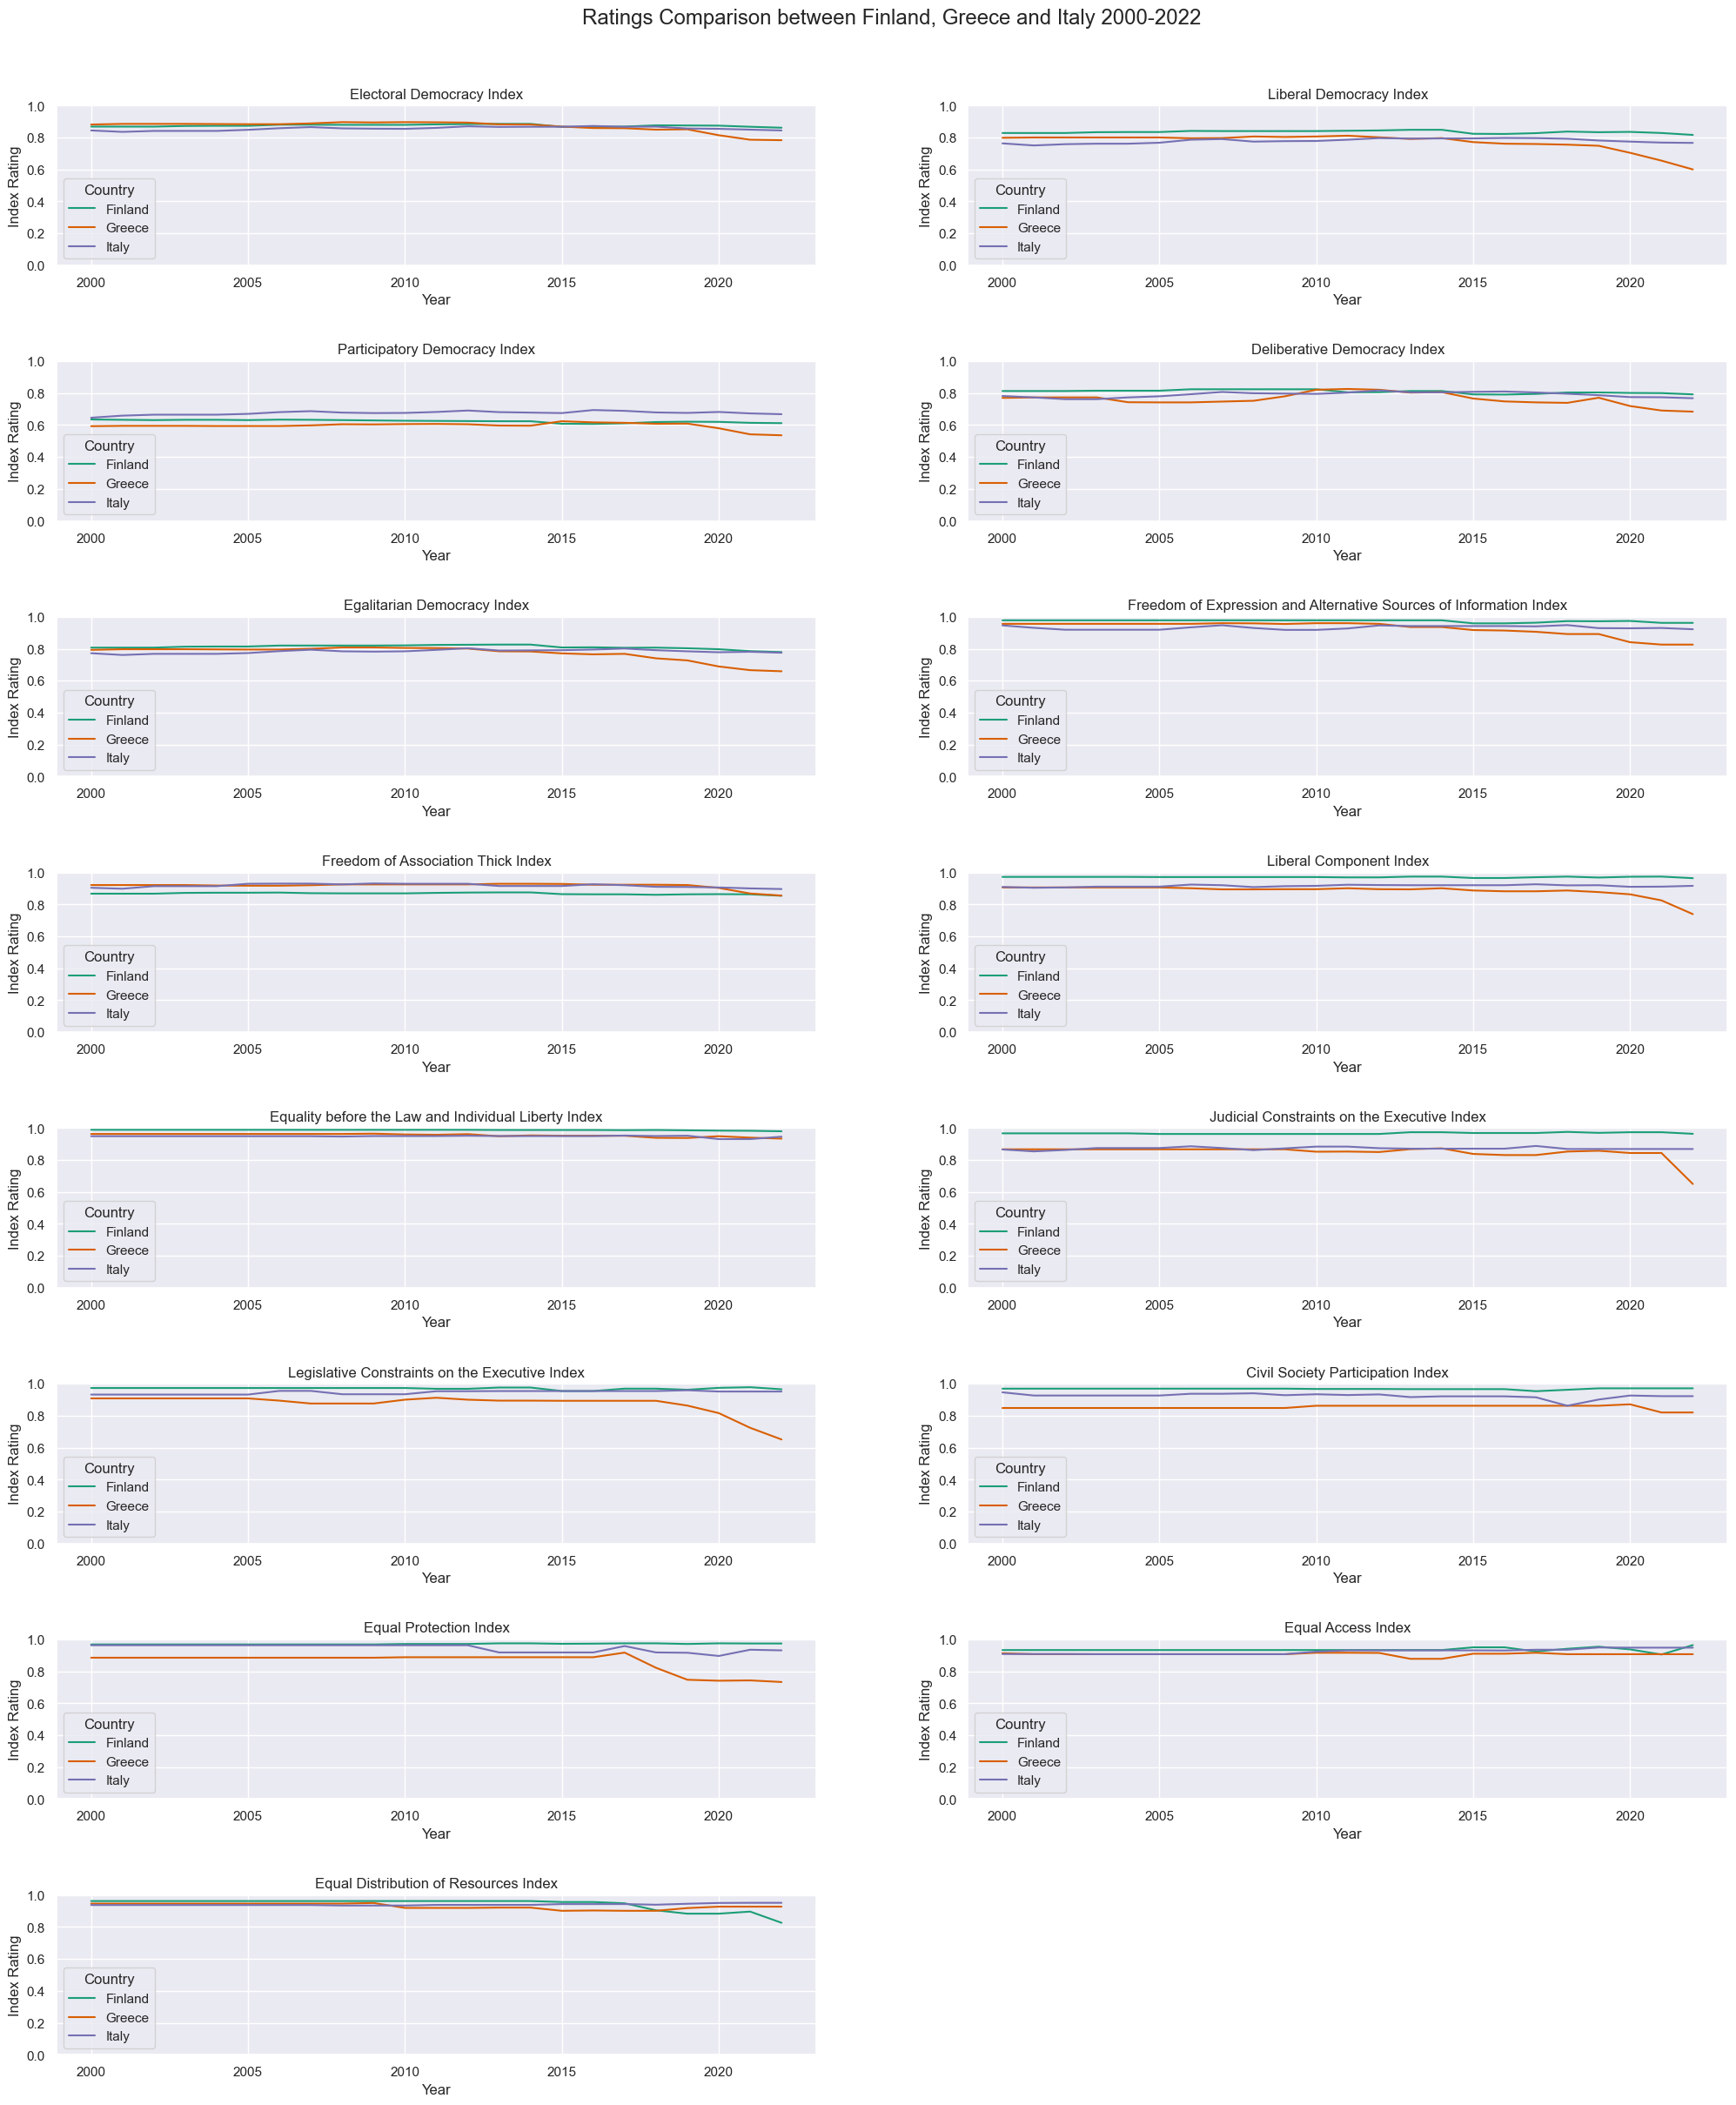

In [27]:
# All indicators and indices for countries in Europe in 2022
indicator_list = list(renaming_convention_dict.values())
indicator_list.remove("Country_Name")

# Titles
indicator_titles= [underscore.replace("_", " ") for underscore in indicator_list]
indicator_titles = [titles.replace("Of", "of")
                    .replace("The", "the")
                    .replace("On", "on")
                    .replace("And", "and") for titles in indicator_titles] 

# Italy, Finland, Greece comparison for all indicators and indices

fig = plt.figure(figsize=(24, 28))

# Plot fifteen line charts and sixteen axes
for n, indicator in enumerate(indicator_list):
    ax = plt.subplot(8, 2, n+1)
    plot_comparison_lines(fingrit, indicator)
    plt.title(indicator_titles[n])
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.2,
                        hspace=0.6)
    
fig.suptitle("Ratings Comparison between Finland, Greece and Italy 2000-2022", fontsize="x-large", y=0.94);

This set of graphs clarifies which areas of Greek democracy declined, when, and how significant the change in each index is. It would appear that most indices have very small, if any, fluctuations until 2014, with the only notable exception being the Deliberative Democracy Index as noted previously.

It is also quite evident that only Greece has this kind of massive fluctuations in its indices, suggesting that COVID-19 was not the actual factor behind the erosion of democratic structures in Greece from 2019 onwards. Of course, without an examination of the actual legislation passed during that period, it is hard to tell if COVID-19 was used as a pretext for the changes or if it merely coincided with the government's pursuit of its agenda.

When it comes to the actual indicators themselves, it would appear that the two ratings that had significant changes before 2019 were the Egalitarian Democracy Index, which began deteriorating in 2016 and steadily continues to do so, and the Equal Protection Index, which significantly decreased in 2016 and has since remained stable at around 6.8, suggesting perhaps that certain legislation was passed by the then government, still in effect, is the reason behind the decrease.

Apart from these two indexes, almost every other index declines from 2019 onwards, especially those associated with liberal democracy. The data, therefore, suggest that it was indeed the 2019 election and the subsequent government choices that led to this outcome. It appears that the biggest decrease was in the Legislative Constraints on the Executive Index, i.e *"the extent that the legislature and government agencies e.g., comptroller general, general prosecutor, or ombudsman are capable of questioning, investigating, and exercising oversight over the executive"("*V-DEM, Varieties of Democracy Codebook*", v13 - March 2023, p. 51).

Up next, we can see how all of the countries in Europe compare to each other in each index and indicator in 2022:

In [28]:
vdem_europe_2022 = vdem_europe_stats[vdem_europe_stats["year"] == 2022].reset_index().drop(["index", "year"], axis=1)
vdem_europe_2022.isna().values.any()

False

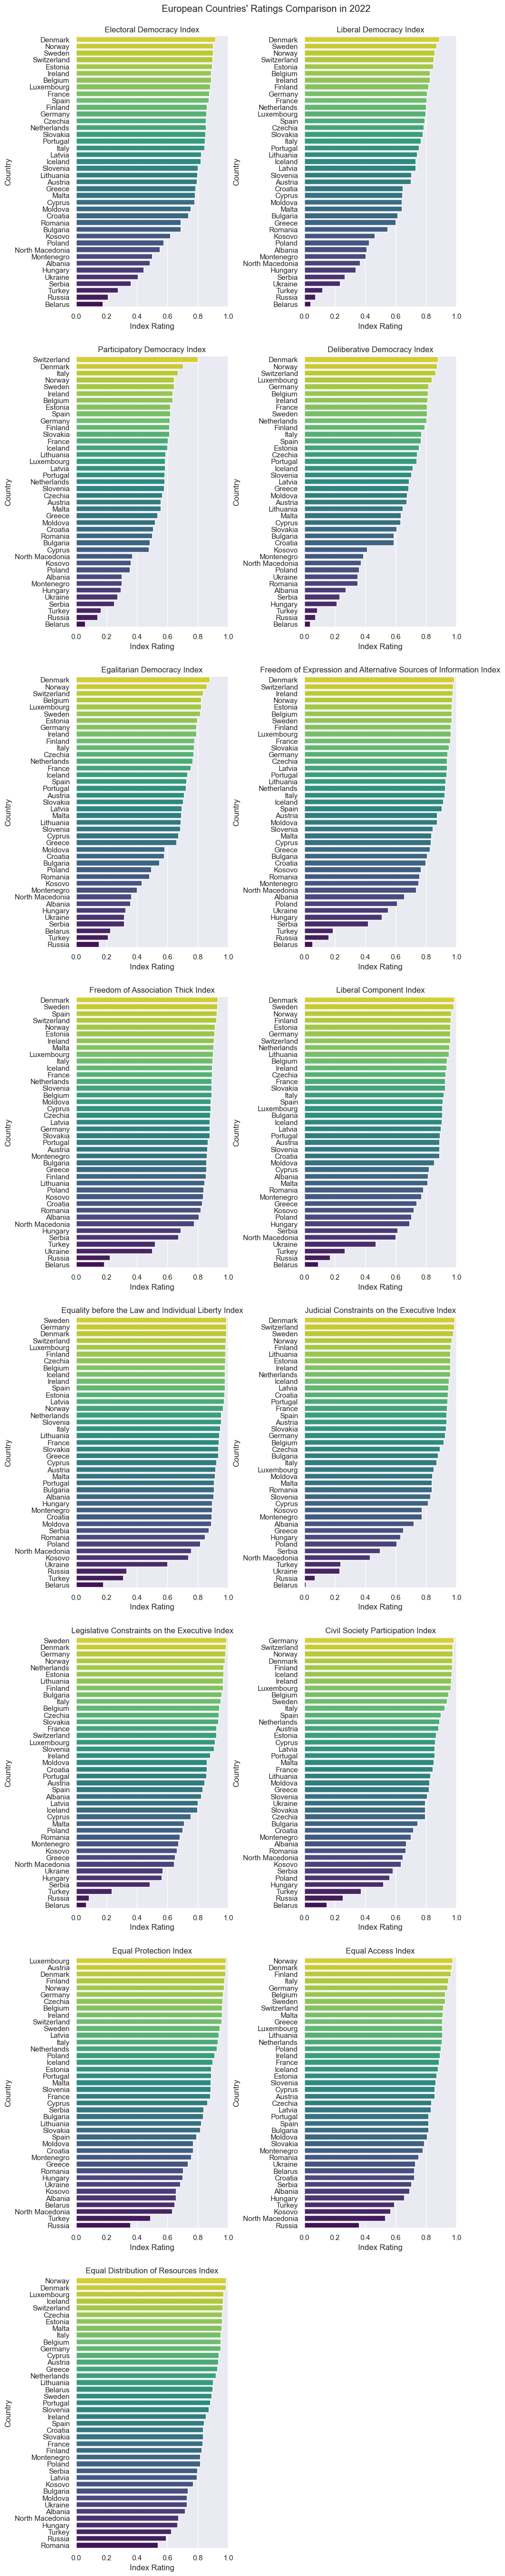

In [29]:
# Plot fifteen bar charts and create sixteen axes
fig = plt.figure(figsize=(10, 66))

#Like previously, plt bar charts for all countries

for n, indicator in enumerate(indicator_list):
    ax = plt.subplot(8, 2, n+1)
    plot_comparison_indicator_bars(vdem_europe_2022, indicator)
    plt.title(indicator_titles[n])
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.5,
                        hspace=0.18)
    
    
fig.suptitle("European Countries' Ratings Comparison in 2022", fontsize="large", y=0.91);

At a glance, we can see how Belarus scores even lower than Russia and Turkey in the vast majority of indicators and indices, while Denmark, Norway, and Sweden consistently score the highest. What is also interesting is the general gap in participatory democracy in all countries in Europe except Switzerland and Denmark.

While each graph is revealing on its own, it is hard to connect them all at once to draw conclusions about a specific country. As such, we will create a function that will return us the position of any country we input in every index compared to the others, along with their score:

In [30]:
# Function to find country position in an indicator
def search_country_position(data, indname, country, declaration=True, rating=False):
    data = data.sort_values(by=indname, ascending=False).reset_index()
# Get position of country
    country_position = data[data["Country_Name"] == country].index.values+1
    country_score_all_scores = data.loc[data["Country_Name"] == country]
# Get score     
    country_desired_score =  country_score_all_scores[indname].to_list()  
    if declaration is False and rating is False:
        return country_position
    elif declaration is True and rating is True:
        print(f"Out of the 40 countries measured, {country} is in position {country_position} in {indname} ratings,\
        with a score of {country_desired_score}. \n")
    elif declaration is True and rating is False:
         print(f"Out of the 40 countries measured, {country} is in position {country_position} in {indname} ratings,\
         \nwith a score of {country_desired_score}. \n")
    else: 
        return country_desired_score

for indicator in indicator_list:
    search_country_position(vdem_europe_2022, indicator, "Greece", declaration=True, rating=False)

Out of the 40 countries measured, Greece is in position [23] in Electoral_Democracy_Index ratings,         
with a score of [0.783]. 

Out of the 40 countries measured, Greece is in position [28] in Liberal_Democracy_Index ratings,         
with a score of [0.6]. 

Out of the 40 countries measured, Greece is in position [24] in Participatory_Democracy_Index ratings,         
with a score of [0.536]. 

Out of the 40 countries measured, Greece is in position [20] in Deliberative_Democracy_Index ratings,         
with a score of [0.684]. 

Out of the 40 countries measured, Greece is in position [25] in Egalitarian_Democracy_Index ratings,         
with a score of [0.659]. 

Out of the 40 countries measured, Greece is in position [26] in Freedom_of_Expression_and_Alternative_Sources_of_Information_Index ratings,         
with a score of [0.826]. 

Out of the 40 countries measured, Greece is in position [26] in Freedom_of_Association_Thick_Index ratings,         
with a score of [0.855]. 



In [31]:
# Find Greece's highest and lowest rankings
greece_comp_positions = {}
for indicator in indicator_list:
    greece_comp_positions[indicator] = search_country_position(vdem_europe_2022, indicator, "Greece", declaration=False)

# Find Greece's highest and lowest ratings 
greece_comp_ratings = {}
for indicator in indicator_list:
    greece_comp_ratings[indicator] = search_country_position(vdem_europe_2022, indicator, "Greece",
                                                             declaration=False, rating=True)

print(f"""Greece has its worst rating in the {max(greece_comp_positions, key=greece_comp_positions.get)},
ranked {max(greece_comp_positions.values())} out of a total of 40 countries in Europe, \
with a score of {max(greece_comp_ratings.values())}.\n""")   

print(f"""Greece has its best rating in the {min(greece_comp_positions, key=greece_comp_positions.get)},
ranked {min(greece_comp_positions.values())} out of a total of 40 countries in Europe, \
with as score of {min(greece_comp_ratings.values())}.""")

Greece has its worst rating in the Legislative_Constraints_on_the_Executive_Index,
ranked [33] out of a total of 40 countries in Europe, with a score of [0.934].

Greece has its best rating in the Equal_Access_Index,
ranked [10] out of a total of 40 countries in Europe, with as score of [0.536].


We can clearly see that in the majority of indices Greece is in the 25th-35th position out of 40 countries, with its worst rating being indeed in the Legislative Constraints on the Executive Index, as we observed above.

Interestingly, Greece scores very high in the Equal Access Index and the Equal Distribution of Resources Index. Therefore we could say that, despite the erosion of the liberal aspects of democracy, there is still a strong legal foundation promoting and supporting equality in Greece. Additionally, there is a more even concentration of wealth (i.e., a smaller gap between rich and poor and the middle class) than in other, much richer, countries, such as Sweden and Finland.

Nevertheless, some of these figures may appear somewhat alarming. The erosion of Greek democratic processes after the 2019 election is also a general theme that is oftentimes used by the Greek opposition to attack the government. Even though the indices and indicators themselves are revealing, especially when pitted against other countries, it would be interesting to compare them to periods of governments that were (or turned out to be eventually) genuinely undemocratic.  

In the next set of graphs, I will attempt to compare the actual effect of the first years of the government of Kyriakos Mitsotakis (2019-ongoing)  in Greece's democracy by juxtaposing its indicator ratings to the ratings of the first years in power of governments which eventually adopted more autocratic political processes: the government of Viktor Orbán from Hungary (2010-2013), of Recep Tayyip Erdoğan from Turkey (2003-2006), and finally, of Adolf Hitler, from Nazi Germany (1933-1936). 

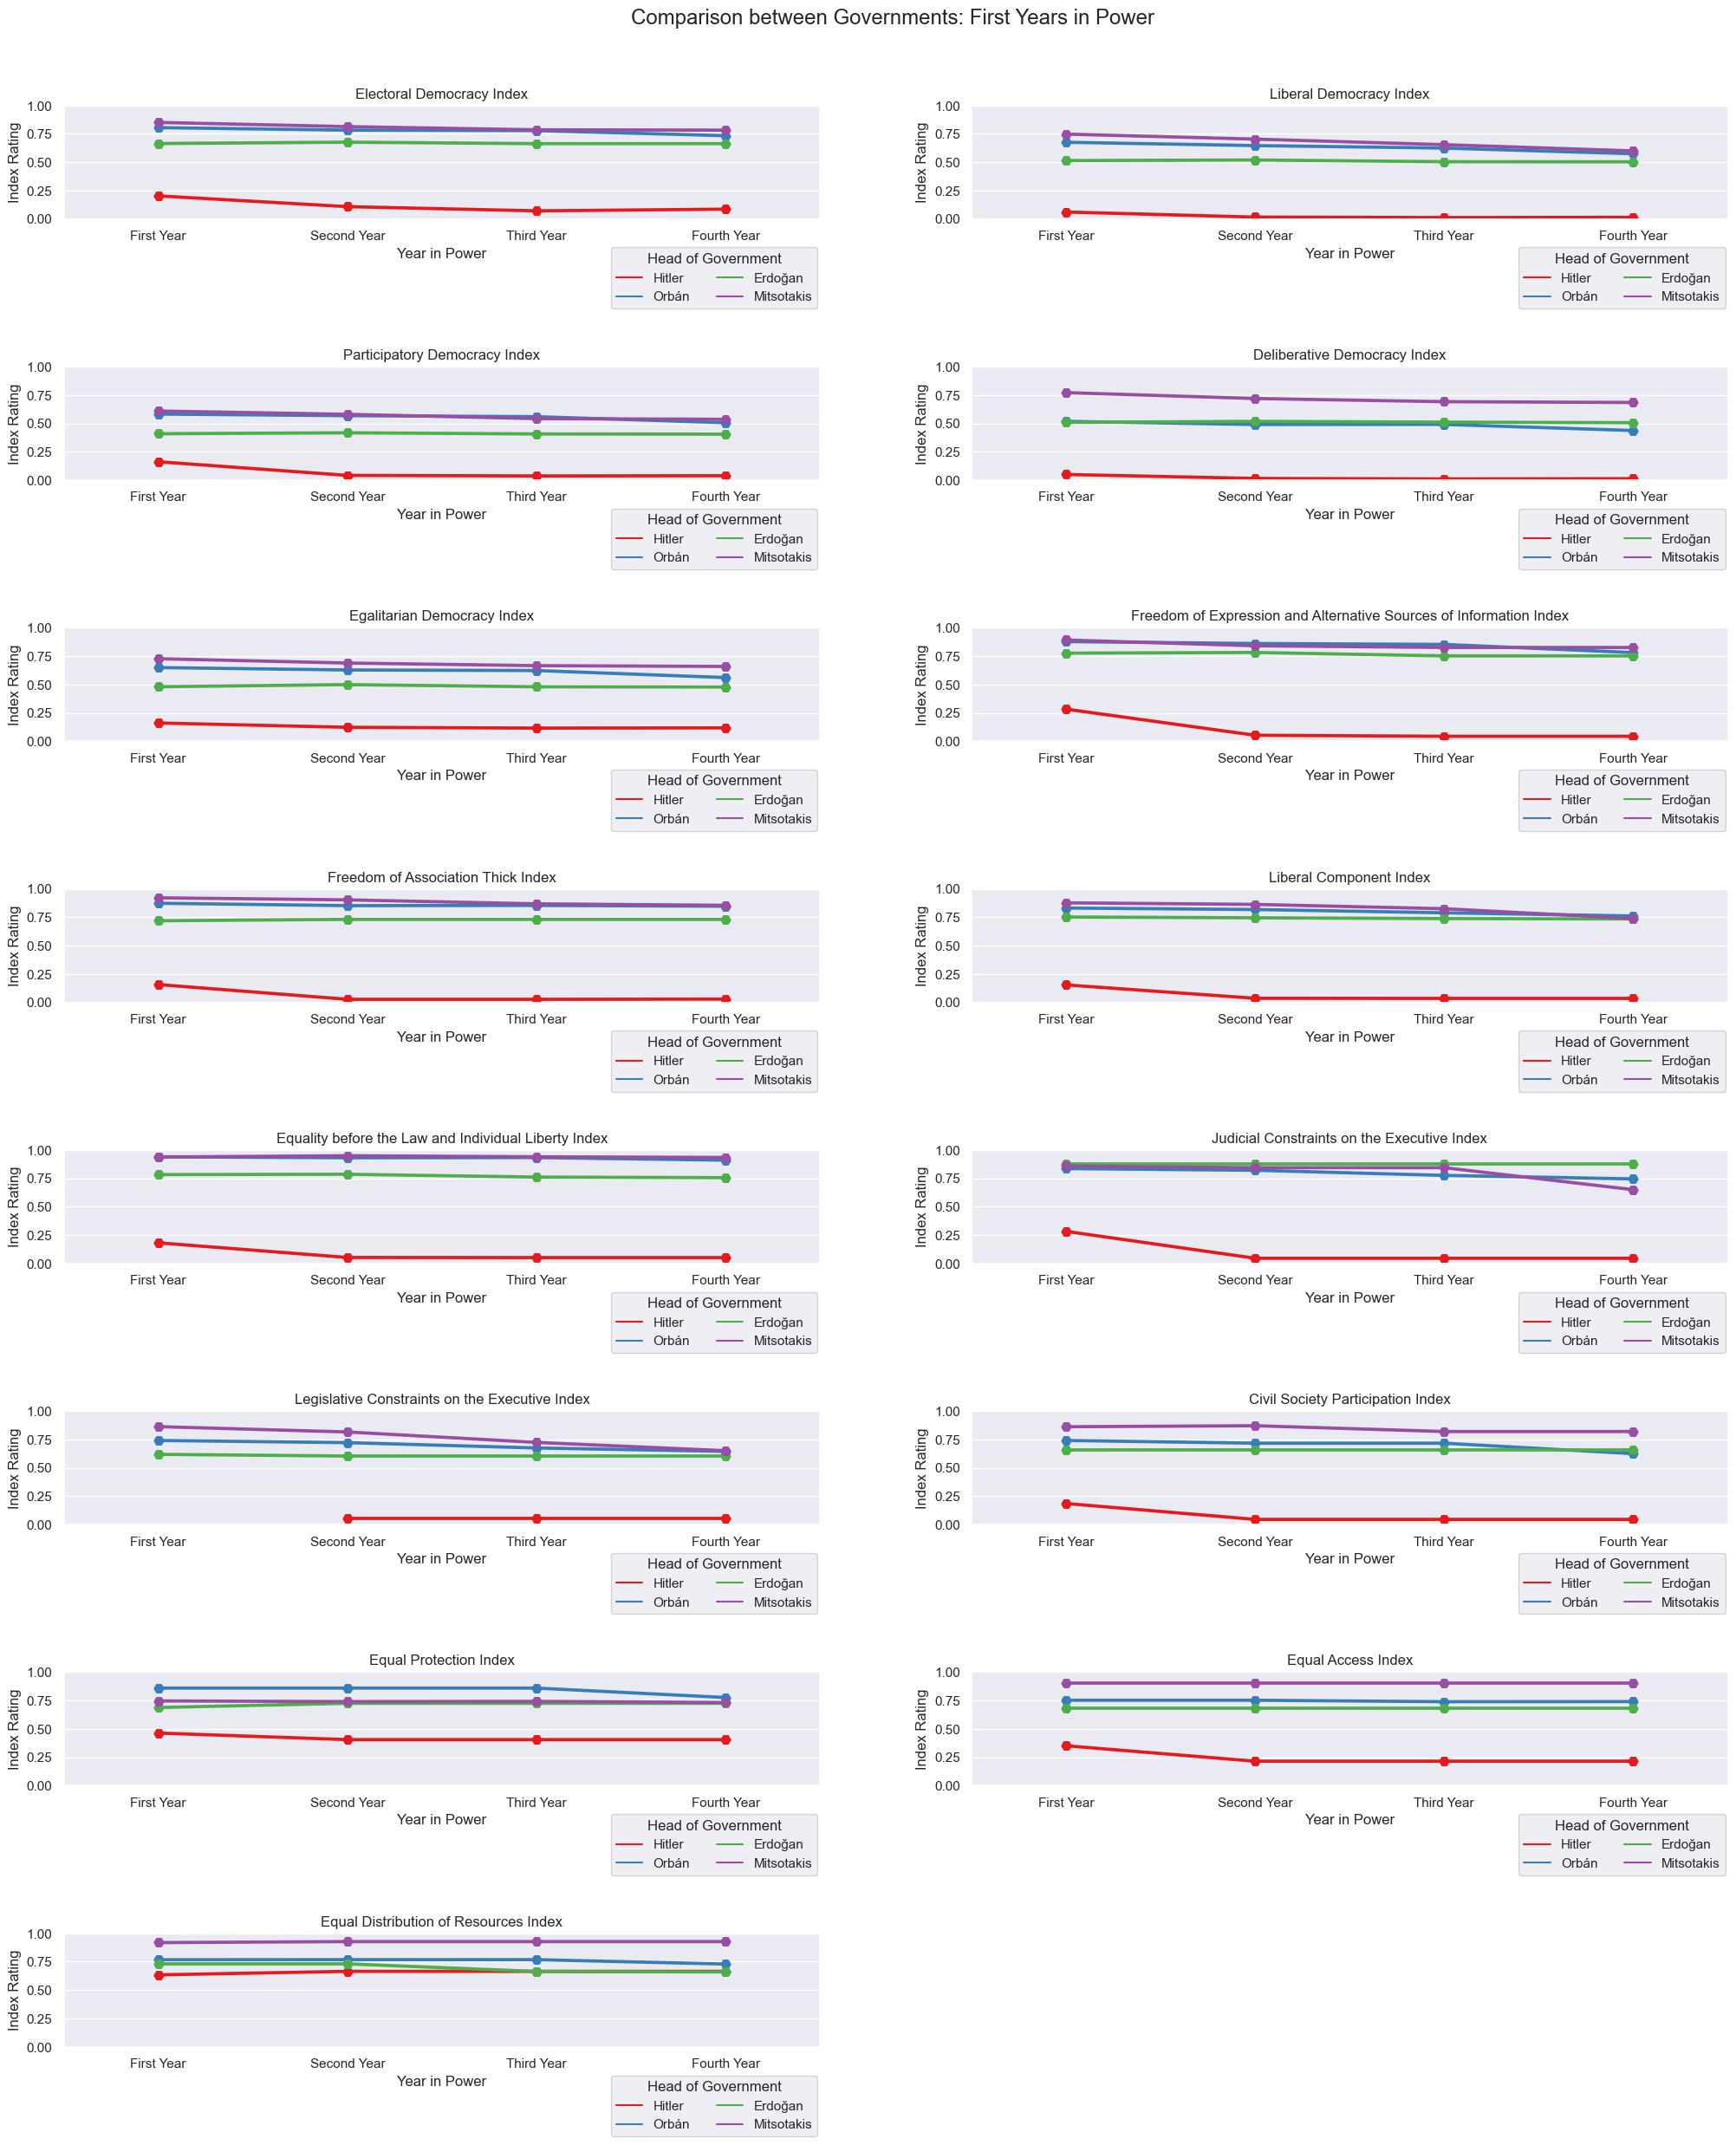

In [32]:
# Dataset manipulation to obtain the first years in power of the four heads of government
hitler_first_years = select_country("Germany", 1933, 1936)
orbán_first_years = select_country("Hungary", 2010, 2013)
erdoğan_first_years = select_country("Turkey", 2003, 2006)
mitsotakis_first_years = select_country("Greece", 2019, 2022)

four_heads_first_years = pd.concat([hitler_first_years, orbán_first_years, erdoğan_first_years, mitsotakis_first_years])


four_heads = four_heads_first_years.replace({1933: "First Year",
                                             2003: "First Year",
                                             2010: "First Year",
                                             2019: "First Year",
                                             1934: "Second Year",
                                             2004: "Second Year",
                                             2011: "Second Year",
                                             2020: "Second Year",
                                             1935: "Third Year", 
                                             2005: "Third Year",
                                             2012: "Third Year",
                                             2021: "Third Year",
                                             1936: "Fourth Year",
                                             2006: "Fourth Year",
                                             2013: "Fourth Year",
                                             2022: "Fourth Year"})

four_heads = four_heads.reset_index(drop=True)


# Reform of previous funtion to better fit our current data
def plot_heads_lines(data, indname):
    data_needed = data.rename(columns={"Country_Name": "Country", indname: "Indicator"})
    lines = sns.pointplot(data_needed, x="year", y="Indicator", hue="Country", markers= "H",
                          palette="Set1",  errorbar=None).set(ylabel="Index Rating",
                                                              xlabel="Year in Power", 
                                                              ylim=(0, 1))
    return lines


fig = plt.figure(figsize=(24, 28))

# Fake handles for legend because sns legends do not appear clear enough 
germany_legend = mlines.Line2D([], [], color="#e41a1c", label="Hitler")
hungary_legend = mlines.Line2D([], [], color="#377eb8", label="Orbán")
turkey_legend = mlines.Line2D([], [], color="#4daf4a", label="Erdoğan")
greece_legend = mlines.Line2D([], [], color="#984ea3", label="Mitsotakis")

# Plot fifteen line charts and sixteen axes, as before
for n, indicator in enumerate(indicator_list):
    ax = plt.subplot(8, 2, n+1)
    plot_heads_lines(four_heads, indicator)
    plt.title(indicator_titles[n])
    ax.legend(handles=[germany_legend, hungary_legend, turkey_legend, greece_legend], 
              bbox_to_anchor=(0.36, -0.8, 1., .102), loc="lower center",
              ncols=2, borderaxespad=0.1, title="Head of Government")
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.2,
                        hspace=1.3)


fig.suptitle("Comparison between Governments: First Years in Power ", fontsize="x-large", y=0.94);

We can immediately observe that none of the three governments, at least in their first years in power, came close to the state that Germany was in in 1933, even before Hitler became chancellor. All indicators show a German political system that was already severely undemocratic, with the first years of the Hitler cabinet only solidifying the already low ratings. Even the Equal Distribution of Resources Index, which seems to be the highest in the case of Germany in 1933, is at the lowest point when compared to the other three governments.

On the other hand, it would appear that Erdoğan's first years in government had almost no significant impact on any of the indices, suggesting that the very low ratings seen in 2022 in the previous charts were influenced by political decisions in the subsequent years he maintained power.

Out of the four heads of government, the first years of Kyriakos Mitsotakis seem to be closer in terms of his government's negative impact on democratic processes to the first years of Viktor Orbán. In fact, many of the indicators show the exact same slope and, on occasion, the same approximate rating. 

Both governments had a similar effect on the liberal aspects of democracy, resulting in declines in the Liberal Component Index, the Liberal Democracy Index, and the Freedom of Association Index. However, Mitsotakis' government seems to have had a much bigger negative impact in the two indexes describing constraints of executive power (Legislative and Judicial Constraints Indices), while faring much better in the Equal Access, Equal Distribution of Resources, Civil Society Participation, and Freedom of Expression Indices, which remained mostly unchanged.

Overall, we could say that Orbán's first years in power dealt a bigger blow to most aspects related to deliberative democracy while Mitsotakis' government mostly focused on eliminating constraints to his government's power. Additionally, both governments very negatively influenced their respective countries' liberal aspects of democracy.

Considering what happened in Hungary's democracy in the subsequent years that Orbán remained in power until today, one may be tempted to assume the worst about Greece's democracy in the future. I suppose only time will tell. 

# 5. Recreation of an official V-DEM Graphing Tool Visualization:

Finally, moving away from the EU and Greece, I would like to close this demonstration with a final, very quick look at the global dimension of democracy. For this purpose,  I will recreate a figure which can also be obtained by using the official V-Dem Dataset graphing tool ```HeatMap```, available at https://v-dem.net/data_analysis/HeatGraph/. 

In our first visualization, the heatmap presents the number of countries worldwide mapped to the Electoral Index Rating, arguably the most high-level of the five indices, from 2000 to 2022.

Unfortunately, the recreation of this graph requires very specific dataset manipulation, and none of the previous objects can be used. I am not proficient in Java and as such I cannot really understand the original source code of the graphing tool, but it would probably look something like this in Python:

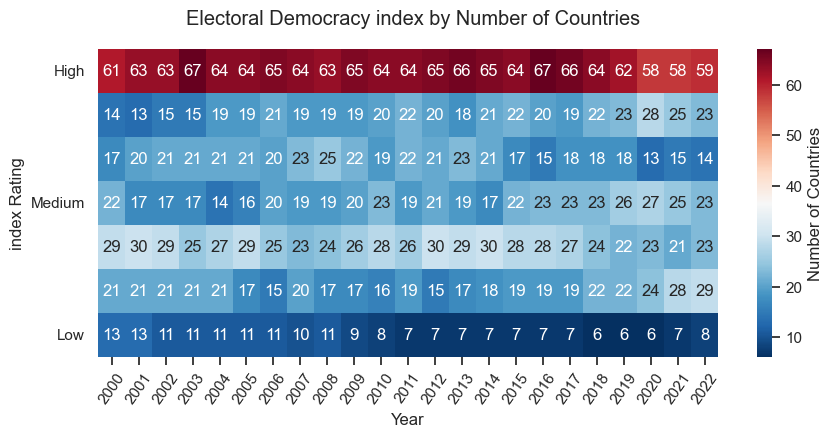

In [33]:
# Select dataframe with relevant columns from 2000 to 2022

vdem_for_heatmap = vdem[["Country_Name", "Electoral_Democracy_Index", "year"]]
vdem_for_heatmap_2000 = vdem_for_heatmap[vdem_for_heatmap["year"] > 1999]


# Find out the number of countries for each index Rating for every year
vdem_country_number = vdem_for_heatmap_2000.groupby(["Electoral_Democracy_Index", "year"]).count()
vdem_c_number = vdem_country_number.reset_index()


# Cut the dataframe and create bins according to index levels while retaining their corresponding years
vdem_c_number_ind_lvls = vdem_c_number.groupby(["year", 
                                                pd.cut(vdem_c_number["Electoral_Democracy_Index"], 
                                                       np.array([0, 0.11, 0.22, 0.33, 0.442, 0.545, 0.655, 1.1]), 
                                                       include_lowest=True)]).sum()
vdem_c_number_ind_lvls = vdem_c_number_ind_lvls.drop(["Electoral_Democracy_Index"], axis=1)
vdem_c_number_ind_lvls = vdem_c_number_ind_lvls.reset_index()


# Turn the dataframe into wide format and sort accordingly
vdem_c_num_ind_final = vdem_c_number_ind_lvls.pivot_table(columns="year", index="Electoral_Democracy_Index",  
                                                          values="Country_Name")
vdem_c_num_ind_final.sort_index(ascending=False, inplace=True)

# Plot the heatmap from the final version of the dataframe
fig = plt.figure(figsize=(10, 4))
with sns.axes_style("ticks"):
    sns.heatmap(vdem_c_num_ind_final, annot=True, cmap="RdBu_r", cbar_kws={"label": "Number of Countries"})
    plt.xticks(rotation=55)
    plt.yticks([6.5, 3.5, 0.5], ["Low", "Medium", "High"])
    plt.ylabel("index Rating")
    plt.xlabel("Year")
    plt.tick_params(axis="y", color="white")

fig.suptitle("Electoral Democracy index by Number of Countries", x=0.44, fontsize="large");

The equivalent function which would allow us to choose the indicator and the time period would look something like this: 

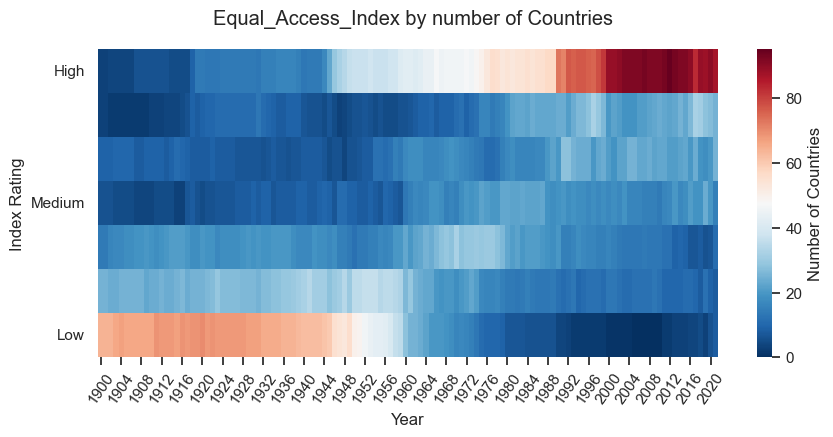

In [34]:
def create_heatmap(indicator_name, starting_year, ending_year, annot=False):
# Choose a period   
    vdem_for_heatmap = vdem[["Country_Name", indicator_name, "year"]]
    vdem_for_heatmap_year = vdem_for_heatmap.loc[(vdem_for_heatmap["year"] >= starting_year)
                                                 & (vdem_for_heatmap["year"] <= ending_year)]

# Find out the number of countries for each Index Rating for every year
    vdem_country_number = vdem_for_heatmap_year.groupby([indicator_name, "year"]).count()
    vdem_c_number = vdem_country_number.reset_index() 
    

# Cut the dataframe and create bins according to index levels while retaining their corresponding years
    vdem_c_number_ind_lvls = vdem_c_number.groupby(["year", 
                                                    pd.cut(vdem_c_number[indicator_name], 
                                                           np.array([0, 0.11, 0.22, 0.33, 0.442, 0.545, 0.655, 1.1]), 
                                                           include_lowest=True)]).sum()
    vdem_c_number_ind_lvls = vdem_c_number_ind_lvls.drop([indicator_name], axis=1)
    vdem_c_number_ind_lvls = vdem_c_number_ind_lvls.reset_index()
    
    
# Turn the dataframe into wide format and sort
    vdem_c_num_ind_final = vdem_c_number_ind_lvls.pivot_table(columns="year", index=indicator_name,  
                                                              values="Country_Name")
    
    vdem_c_num_ind_final.sort_index(ascending=False, inplace=True)
    
    
# Plot the heatmap from the final version of the dataframe
    fig = plt.figure(figsize = (10, 4))
    with sns.axes_style("ticks"):
        if annot:
            sns.heatmap(vdem_c_num_ind_final, annot=True, cmap="RdBu_r", cbar_kws={"label": "Number of Countries"})
        if not annot:
            sns.heatmap(vdem_c_num_ind_final, annot=False, cmap="RdBu_r", cbar_kws={"label": "Number of Countries"})
        plt.xticks(rotation = 55)
        plt.yticks([6.5, 3.5, 0.5], ["Low", "Medium", "High"])
        plt.ylabel("Index Rating")
        plt.xlabel("Year")
        plt.tick_params(axis ="y", color="white")
        fig.suptitle(f"{indicator_name} by number of Countries", x=0.44, fontsize="large");
        
        
        
create_heatmap("Equal_Access_Index", 1900, 2021, annot=False)

# 6. Full V-DEM Dataset Citation:


V-Dem Dataset:
Coppedge, Michael, John Gerring, Carl Henrik Knutsen, Staffan I. Lindberg, Jan Teorell, David Altman, Michael Bernhard, Agnes Cornell, M. Steven Fish, Lisa Gastaldi, Haakon Gjerløw, Adam Glynn, Ana Good God, Sandra Grahn, Allen Hicken, Katrin Kinzelbach, Joshua Krusell, Kyle L. Marquardt, Kelly McMann, Valeriya Mechkova, Juraj Medzihorsky, Natalia Natsika, Anja Neundorf, Pamela Paxton, Daniel Pemstein, Josefine Pernes, Oskar Rydén, Johannes von Römer, Brigitte Seim, Rachel Sigman, Svend-Erik Skaaning, Jeffrey Staton, Aksel Sundström, Eitan Tzelgov, Yi-ting Wang, Tore Wig, Steven Wilson and Daniel Ziblatt. 2023. "V-Dem Dataset v13" Varieties of Democracy (V-Dem) Project. https://doi.org/10.23696/vdemds23.


Pemstein, Daniel, Kyle L. Marquardt, Eitan Tzelgov, Yi-ting Wang, Juraj Medzihorsky, Joshua Krusell, Farhad Miri, and Johannes von Römer. 2023. “The V-Dem Measurement Model: Latent Variable Analysis for Cross-National and Cross-Temporal Expert-Coded Data”. V-Dem Working Paper No. 21. 8th edition. University of Gothenburg: Varieties of Democracy Institute.

V-Dem Codebook:
Coppedge, Michael, John Gerring, Carl Henrik Knutsen, Staffan I. Lindberg, Jan Teorell, David Altman, Michael Bernhard, Agnes Cornell, M. Steven Fish, Lisa Gastaldi, Haakon Gjerløw, Adam Glynn, Sandra Grahn, Allen Hicken, Katrin Kinzelbach, Kyle L. Marquardt, Kelly McMann, Valeriya Mechkova, Anja Neundorf, Pamela Paxton, Daniel Pemstein, Oskar Rydén, Johannes von Römer, Brigitte Seim, Rachel Sigman, Svend-Erik Skaaning, Jeffrey Staton, Aksel Sundström, Eitan Tzelgov, Luca Uberti, Yi-ting Wang, Tore Wig, and Daniel Ziblatt. 2023. "V-Dem Codebook v13" Varieties of Democracy (V-Dem) Project.

V-Dem Methodology:
Coppedge, Michael, John Gerring, Carl Henrik Knutsen, Staffan I. Lindberg, Jan Teorell, Kyle L. Marquardt, Juraj Medzihorsky, Daniel Pemstein, Lisa Gastaldi, Sandra Grahn, Josefine Pernes, Oskar Rydén, Johannes von Römer, Eitan Tzelgov, Yi-ting Wang, and Steven Wilson. 2023. "V-Dem Methodology v13" Varieties of Democracy (V-Dem) Project.

V-Dem Country Coding Units:
Coppedge, Michael, John Gerring, Carl Henrik Knutsen, Staffan I. Lindberg, Jan Teorell, Lisa Gastaldi, Ana Good God, and Sandra Grahn. 2023. "V-Dem Country Coding Units v13" Varieties of Democracy (V-Dem) Project.

V-Dem Organization and Management:
Coppedge, Michael, John Gerring, Carl Henrik Knutsen, Staffan I. Lindberg, Jan Teorell, Lisa Gastaldi, Sandra Grahn, Natalia Natsika, Josefine Pernes, Oskar Rydén, and Johannes von Römer. 2023. "V-Dem Organization and Management v13" Varieties of Democracy (V-Dem) Project.